In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [88]:
dataset1 = pd.read_csv('play_by_play_2021.csv', low_memory=False)
dataset2 = pd.read_csv('play_by_play_2020.csv', low_memory=False)
dataset3 = pd.read_csv('play_by_play_2019.csv', low_memory=False)
dataset4 = pd.read_csv('play_by_play_2018.csv', low_memory=False)
dataset5 = pd.read_csv('play_by_play_2017.csv', low_memory=False)


dataset1 = dataset1[dataset1['down']==4]
dataset1 = dataset1[['week',
                   'yardline_100',
                   'half_seconds_remaining',
                   'game_seconds_remaining',
                   'ydstogo',
                   'play_type',
                   'posteam_timeouts_remaining',
                   'defteam_timeouts_remaining',
                   'score_differential',
                   'no_score_prob',
                   'opp_fg_prob',
                   'opp_safety_prob',
                   'fg_prob',
                   'td_prob',
                   'epa',
                   'wp',
                   'def_wp',
                   'wpa',
                   'weather']]

dataset2 = dataset2[dataset2['down']==4]
dataset2 = dataset2[['week',
                   'yardline_100',
                   'half_seconds_remaining',
                   'game_seconds_remaining',
                   'ydstogo',
                   'play_type',
                   'posteam_timeouts_remaining',
                   'defteam_timeouts_remaining',
                   'score_differential',
                   'no_score_prob',
                   'opp_fg_prob',
                   'opp_safety_prob',
                   'fg_prob',
                   'td_prob',
                   'epa',
                   'wp',
                   'def_wp',
                   'wpa',
                   'weather']]

dataset3 = dataset3[dataset3['down']==4]
dataset3 = dataset3[['week',
                   'yardline_100',
                   'half_seconds_remaining',
                   'game_seconds_remaining',
                   'ydstogo',
                   'play_type',
                   'posteam_timeouts_remaining',
                   'defteam_timeouts_remaining',
                   'score_differential',
                   'no_score_prob',
                   'opp_fg_prob',
                   'opp_safety_prob',
                   'fg_prob',
                   'td_prob',
                   'epa',
                   'wp',
                   'def_wp',
                   'wpa',
                   'weather']]

dataset4 = dataset4[dataset4['down']==4]
dataset4 = dataset4[['week',
                   'yardline_100',
                   'half_seconds_remaining',
                   'game_seconds_remaining',
                   'ydstogo',
                   'play_type',
                   'posteam_timeouts_remaining',
                   'defteam_timeouts_remaining',
                   'score_differential',
                   'no_score_prob',
                   'opp_fg_prob',
                   'opp_safety_prob',
                   'fg_prob',
                   'td_prob',
                   'epa',
                   'wp',
                   'def_wp',
                   'wpa',
                   'weather']]

dataset5 = dataset5[dataset5['down']==4]
dataset5 = dataset5[['week',
                   'yardline_100',
                   'half_seconds_remaining',
                   'game_seconds_remaining',
                   'ydstogo',
                   'play_type',
                   'posteam_timeouts_remaining',
                   'defteam_timeouts_remaining',
                   'score_differential',
                   'no_score_prob',
                   'opp_fg_prob',
                   'opp_safety_prob',
                   'fg_prob',
                   'td_prob',
                   'epa',
                   'wp',
                   'def_wp',
                   'wpa',
                   'weather']]

dataset = pd.concat([dataset1, dataset2, dataset3, dataset4, dataset5])

def discretizeData(val):
    if(val < -0.2):
        discretizedData = 0
    elif(val >= -.2 and val < -.15):
        discretizedData  = 1
    elif(val >= -.15 and val < -.1):
        discretizedData = 2
    elif(val >= -.1 and val < -.075):
        discretizedData = 3
    elif(val >= -.075 and val < -.05):
        discretizedData = 4
    elif(val >= -.05 and val < -.025):
        discretizedData = 5
    elif(val >= -.025 and val < 0):
        discretizedData = 6
    elif(val >= 0 and val < 0.025):
        discretizedData = 7
    elif(val >= 0.025 and val < 0.05):
        discretizedData = 8
    elif(val >= 0.05 and val < 0.075):
        discretizedData = 9
    elif(val >= 0.075 and val < 0.1):
        discretizedData = 10
    elif(val >= 0.1 and val < 0.15):
        discretizedData = 11 
    elif(val >= 0.15 and val < 0.2):
        discretizedData = 12
    else: 
        discretizedData = 13
    return discretizedData

def get_wind(weather):
    if type(weather) != 'str':
        return int(0)
    index = weather.find("Wind")
    weather = weather[index:]
    wind = ""
    for m in weather:
        if m.isdigit():
            wind = wind + m
    if wind == "":
        wind = int(0)
    else:
        wind = int(wind)
    return wind

def avoid_NaN(val):
    if type(val) != 'int' and type(val) != 'float_64':
        print(val)
    return val


dataset['weather'] = dataset['weather'].apply(get_wind)
dataset['wpa'] = dataset['wpa'].apply(discretizeData)

runs = dataset[dataset['play_type'] == 'run']
passes = dataset[dataset['play_type'] == 'pass']
punts = dataset[dataset['play_type'] == 'punt']
fgs = dataset[dataset['play_type'] == 'field_goal']

del runs['play_type']
del passes['play_type']
del punts['play_type']
del fgs['play_type']

runs_wpa = runs['wpa']
passes_wpa = passes['wpa']
punts_wpa = punts['wpa']
fgs_wpa = fgs['wpa']

del runs['wpa']
del passes['wpa']
del punts['wpa']
del fgs['wpa']

X_runs = runs.to_numpy()
y_runs = runs_wpa.to_numpy()

X_passes = passes.to_numpy()
y_passes = passes_wpa.to_numpy()

X_punts = punts.to_numpy()
y_punts = punts_wpa.to_numpy()

X_fgs = fgs.to_numpy()
y_fgs = fgs_wpa.to_numpy()

K Neighbors Classifier punts accuracy:
0.3481745325022262
Naive Bayes Bernoulli punts accuracy:
0.40783615316117544
Decision Tree Classifier punts accuracy
0.5325022261798753
Extra Trees Classifier punts accuacy:
0.5868210151380232
Support Vector Classifier punts accuracy


/Users/christian/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.4327693677649154
ADA Boost Classifier punts accuracy
0.40694568121104185


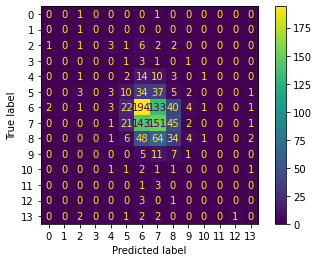

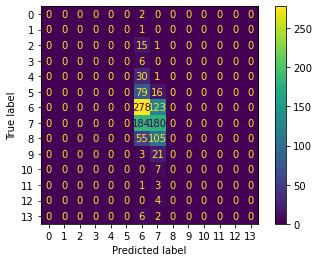

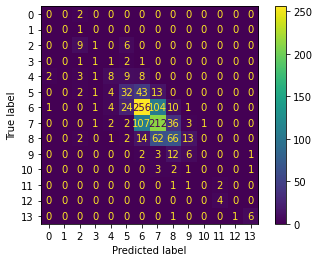

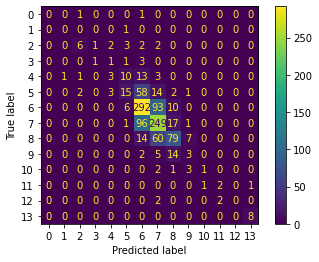

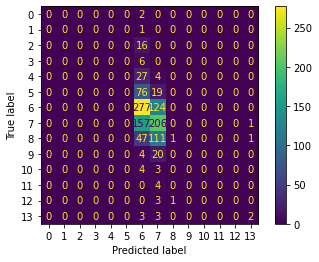

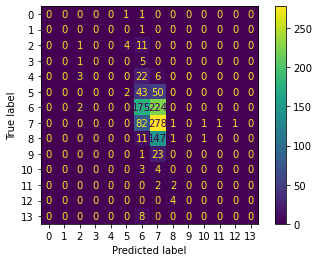

In [208]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

X_runs_train, X_runs_test, y_runs_train, y_runs_test = train_test_split(X_runs, y_runs, test_size=0.1, random_state=41)
X_passes_train, X_passes_test, y_passes_train, y_passes_test = train_test_split(X_passes, y_passes, test_size=0.1, random_state=41)
X_punts_train, X_punts_test, y_punts_train, y_punts_test = train_test_split(X_punts, y_punts, test_size=0.1, random_state=41)
X_fgs_train, X_fgs_test, y_fgs_train, y_fgs_test = train_test_split(X_fgs, y_fgs, test_size=0.1, random_state=41)



print("K Neighbors Classifier punts accuracy:")
neigh = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='ball_tree')
neigh.fit(X_punts_train, y_punts_train)
print(neigh.score(X_punts_test, y_punts_test))
cm1 = confusion_matrix(y_punts_test, neigh.predict(X_punts_test))
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot()

print("Naive Bayes Bernoulli punts accuracy:")
NB = BernoulliNB()
NB.fit(X_punts_train, y_punts_train)
print(NB.score(X_punts_test, y_punts_test))
cm2 = confusion_matrix(y_punts_test, NB.predict(X_punts_test))
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()

print("Decision Tree Classifier punts accuracy", )
DT = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=40, min_samples_split=30, min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features=16, random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
DT.fit(X_punts_train, y_punts_train)
print(DT.score(X_punts_test, y_punts_test))
cm3 = confusion_matrix(y_punts_test, DT.predict(X_punts_test))
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp3.plot()

print("Extra Trees Classifier punts accuacy:")
ET = ExtraTreesClassifier(n_estimators=200, criterion="gini", max_depth=26, bootstrap=False, random_state=0)
ET.fit(X_punts_train, y_punts_train)
print(ET.score(X_punts_test, y_punts_test))
cm4 = confusion_matrix(y_punts_test, ET.predict(X_punts_test))
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4)
disp4.plot()

print("Support Vector Classifier punts accuracy")
SVC = make_pipeline(StandardScaler(), LinearSVC(random_state=0, max_iter=1000))
SVC.fit(X_punts_train, y_punts_train)
print(SVC.score(X_punts_test, y_punts_test))
cm5 = confusion_matrix(y_punts_test, SVC.predict(X_punts_test))
disp5 = ConfusionMatrixDisplay(confusion_matrix=cm5)
disp5.plot()

print("ADA Boost Classifier punts accuracy")
ADA = AdaBoostClassifier(n_estimators=100, random_state=0)
ADA.fit(X_punts_train, y_punts_train)
print(ADA.score(X_punts_test, y_punts_test))
cm6 = confusion_matrix(y_punts_test, ADA.predict(X_punts_test))
disp6 = ConfusionMatrixDisplay(confusion_matrix=cm6)
disp6.plot()

plt.show()

In [38]:
dataset = dataset[dataset['down']==4]
dataset = dataset[['yardline_100',
                   'game_seconds_remaining',
                   'ydstogo',
                   'yards_gained',
                   'field_goal_result',
                   'kick_distance',
                   'posteam_timeouts_remaining',
                   'defteam_timeouts_remaining',
                   'score_differential',
                   'no_score_prob',
                   'opp_fg_prob',
                   'epa',
                   'fg_prob',
                   'wp',
                   'punt_blocked',
                   'fourth_down_converted',
                   'weather',
                   'play_type_nfl']]
print(dataset.head(3))
#for i in range(len(dataset)):
#    print(dataset.at[i,"weather"])
    




#kicks = dataset[dataset['play_type_nfl'] == 'FIELD_GOAL']
#passes = dataset[dataset['play_type_nfl'] == 'PASS']
#rushes = dataset[dataset['play_type_nfl'] == 'RUSH']
#punts = dataset[dataset['play_type_nfl'] == 'PUNT']
#go_for_it = pd.concat([passes, rushes])
#go_for_it1 = go_for_it.drop(go_for_it.columns[[3, 4, 14, 15, 17]], axis=1)
#go_for_it2 = go_for_it[['fourth_down_converted']]
#gfix = go_for_it1.to_numpy()
#gfiy = go_for_it2.to_numpy()
#
#reg = LinearRegression().fit(X_train, y_train)
#reg.score(X_test, y_test)

    yardline_100  game_seconds_remaining  ydstogo  yards_gained  \
5           75.0                  3519.0       10           0.0   
16          16.0                  3266.0       16           0.0   
31          81.0                  3114.0       16           0.0   

   field_goal_result  kick_distance  posteam_timeouts_remaining  \
5                NaN           47.0                         3.0   
16              made           34.0                         2.0   
31               NaN           59.0                         2.0   

    defteam_timeouts_remaining  score_differential  no_score_prob  \
5                          3.0                 0.0       0.005643   
16                         3.0                 0.0       0.001048   
31                         1.0               -10.0       0.023313   

    opp_fg_prob       epa   fg_prob        wp  punt_blocked  \
5      0.246258 -0.345293  0.130574  0.461707           0.0   
16     0.016351  0.247892  0.934702  0.534845           0.0